In [1]:
from pmdarima import auto_arima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.metrics import mean_absolute_error, mean_squared_error

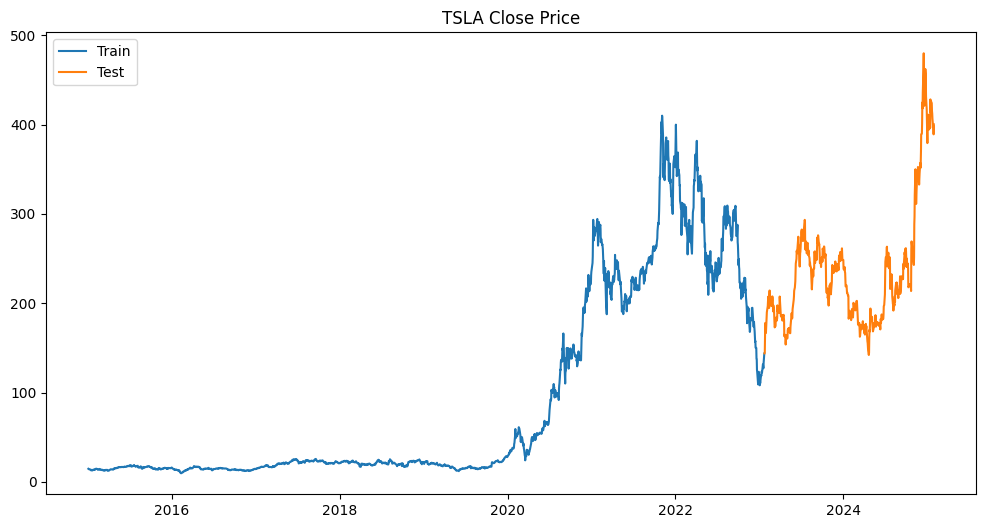

In [2]:
# Load the data, skipping the first two rows which are not needed
data = pd.read_csv("D:/WEEK11 data/historical_data.csv", skiprows=2)

# Set the first row as headers
data.columns = ['Date', 'Close_BND', 'Close_SPY', 'Close_TSLA', 'High_BND', 'High_SPY', 'High_TSLA',
                'Low_BND', 'Low_SPY', 'Low_TSLA', 'Open_BND', 'Open_SPY', 'Open_TSLA',
                'Volume_BND', 'Volume_SPY', 'Volume_TSLA']

# Ensure the 'Date' column is recognized as dates
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Extract Tesla's Close price
tsla_close = data['Close_TSLA']

# Split the data into training and testing sets (80-20 split)
train_size = int(len(tsla_close) * 0.8)
train, test = tsla_close[:train_size], tsla_close[train_size:]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.title('TSLA Close Price')
plt.legend()
plt.show()


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will b

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12684.802, Time=3.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12680.726, Time=0.14 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12679.653, Time=0.31 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12679.753, Time=1.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12678.997, Time=0.12 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12680.805, Time=2.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 7.317 seconds
ARIMA Model MAE: 89.90958562546228
ARIMA Model RMSE: 111.07844416791498
ARIMA Model MAPE: 34.614067420672825%


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result i

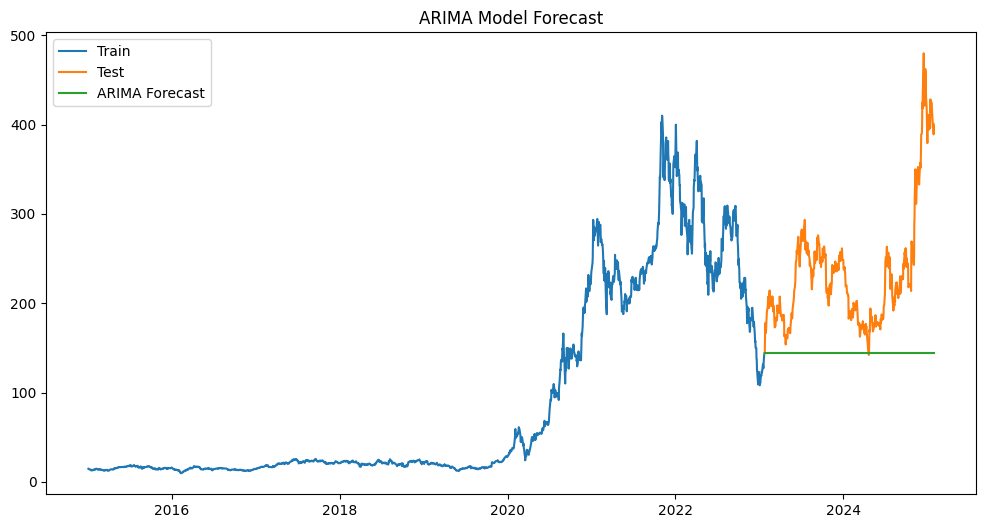

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load and preprocess data
data = pd.read_csv("D:/WEEK11 data/historical_data.csv", skiprows=2)
data.columns = ['Date', 'Close_BND', 'Close_SPY', 'Close_TSLA', 'High_BND', 'High_SPY', 'High_TSLA',
                'Low_BND', 'Low_SPY', 'Low_TSLA', 'Open_BND', 'Open_SPY', 'Open_TSLA',
                'Volume_BND', 'Volume_SPY', 'Volume_TSLA']
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Extract Tesla's Close price
tsla_close = data['Close_TSLA']
train_size = int(len(tsla_close) * 0.8)
train, test = tsla_close[:train_size], tsla_close[train_size:]

# Model Selection and Training
auto_arima_model = auto_arima(train, seasonal=False, trace=True)
p, d, q = auto_arima_model.order
arima_model = SARIMAX(train, order=(p, d, q))
arima_result = arima_model.fit()

# Forecasting
forecast_arima = arima_result.get_forecast(steps=len(test)).predicted_mean
forecast_arima.index = test.index

# Evaluation
mae_arima = mean_absolute_error(test, forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(test, forecast_arima))
mape_arima = np.mean(np.abs((test - forecast_arima) / test)) * 100

print(f"ARIMA Model MAE: {mae_arima}")
print(f"ARIMA Model RMSE: {rmse_arima}")
print(f"ARIMA Model MAPE: {mape_arima}%")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_arima, label='ARIMA Forecast')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will b

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=12678.187, Time=8.49 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=12680.726, Time=0.08 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=12680.415, Time=2.91 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=12680.778, Time=6.02 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=12678.997, Time=0.13 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=12685.575, Time=18.75 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=12685.255, Time=22.16 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=12654.100, Time=69.24 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=12653.424, Time=31.60 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=12651.430, Time=39.65 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=12683.246, Time=12.36 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=12653.412, Time=47.31 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=12676.166, Time=35.24 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,0,0)[12] intercept   : AIC=12649.880, Time=17.37 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=12681.776, Time=3.55 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,0,1)[12] intercept   : AIC=12651.862, Time=21.46 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=12674.917, Time=6.03 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=12648.995, Time=17.08 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=12680.529, Time=4.08 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=12650.978, Time=16.95 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=12673.972, Time=5.74 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=12649.835, Time=12.07 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=12649.519, Time=25.04 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=12648.861, Time=16.69 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=12650.844, Time=23.28 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=12673.846, Time=8.59 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=12649.800, Time=22.32 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=12651.432, Time=46.31 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,0)[12]             : AIC=12647.069, Time=2.33 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[12]             : AIC=12678.695, Time=2.13 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,1)[12]             : AIC=12649.050, Time=3.97 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,1)[12]             : AIC=12672.069, Time=2.78 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,0,0)[12]             : AIC=12648.028, Time=2.97 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,0)[12]             : AIC=12647.998, Time=4.63 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,0,0)[12]             : AIC=12647.722, Time=5.58 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,0)[12]             : AIC=12647.203, Time=2.70 sec


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,0,0)[12]             : AIC=12649.632, Time=9.42 sec

Best model:  ARIMA(1,1,0)(2,0,0)[12]          
Total fit time: 578.666 seconds


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result i

SARIMA Model MAE: 91.82462746710634
SARIMA Model RMSE: 112.59495522388382
SARIMA Model MAPE: 35.491763073313436%


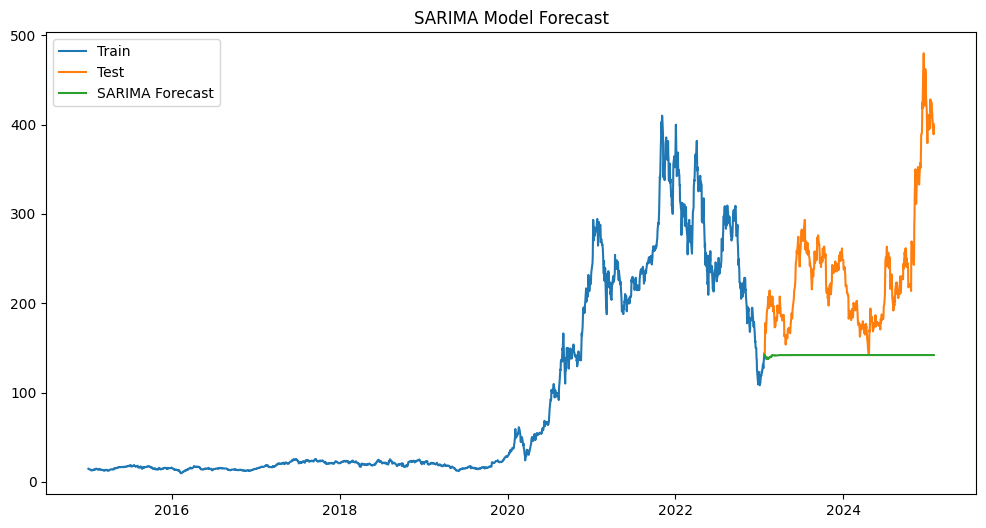

In [4]:
# Model Selection and Training with seasonality
auto_sarima_model = auto_arima(train, seasonal=True, m=12, trace=True)
p, d, q = auto_sarima_model.order
P, D, Q, s = auto_sarima_model.seasonal_order

# Fit SARIMA model
sarima_model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result = sarima_model.fit()

# Forecasting
forecast_sarima = sarima_result.get_forecast(steps=len(test)).predicted_mean
forecast_sarima.index = test.index

# Evaluation
mae_sarima = mean_absolute_error(test, forecast_sarima)
rmse_sarima = np.sqrt(mean_squared_error(test, forecast_sarima))
mape_sarima = np.mean(np.abs((test - forecast_sarima) / test)) * 100

print(f"SARIMA Model MAE: {mae_sarima}")
print(f"SARIMA Model RMSE: {rmse_sarima}")
print(f"SARIMA Model MAPE: {mape_sarima}%")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_sarima, label='SARIMA Forecast')
plt.title('SARIMA Model Forecast')
plt.legend()
plt.show()


Epoch: 0 Loss: 8809974.775149778
Early stopping


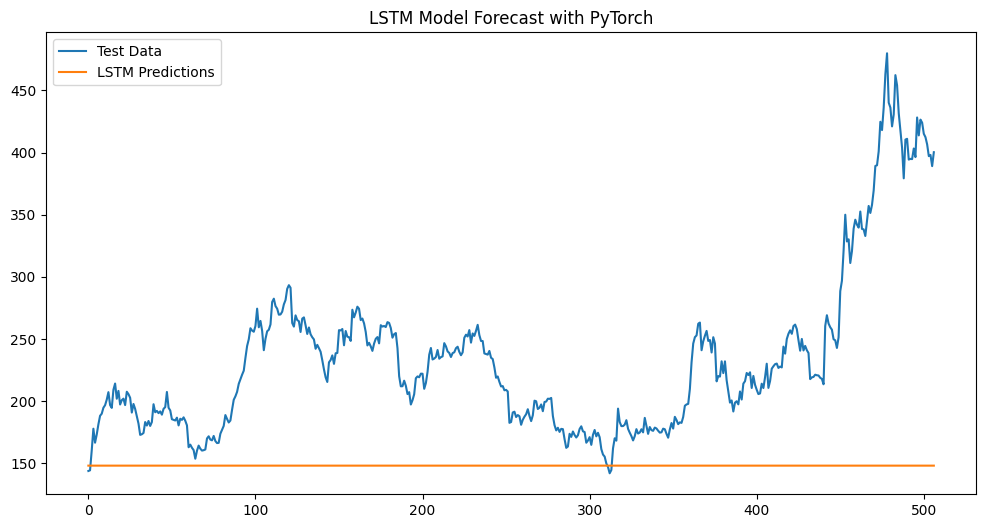

LSTM Model MAE: 85.53461456298828
LSTM Model RMSE: 107.51436586422997
LSTM Model MAPE: 32.640185817072414%


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to prepare data for LSTM
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq, train_label))
    return inout_seq

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_data = torch.FloatTensor(train.values).view(-1).to(device)
test_data = torch.FloatTensor(test.values).view(-1).to(device)
train_window = 60
train_inout_seq = create_inout_sequences(train_data, train_window)

class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super(LSTM, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.hidden_cell = (torch.zeros(1, 1, self.hidden_layer_size).to(device),
                            torch.zeros(1, 1, self.hidden_layer_size).to(device))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

model = LSTM().to(device)
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with reduced epochs and early stopping
epochs = 50
best_loss = float('inf')
for i in range(epochs):
    epoch_loss = 0
    for seq, labels in train_inout_seq:
        seq, labels = seq.to(device), labels.to(device)
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size).to(device),
                             torch.zeros(1, 1, model.hidden_layer_size).to(device))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()
        epoch_loss += single_loss.item()

    # Early stopping
    if epoch_loss < best_loss:
        best_loss = epoch_loss
        torch.save(model.state_dict(), 'best_lstm_model.pth')
    else:
        print("Early stopping")
        break

    if i % 10 == 0:
        print(f'Epoch: {i} Loss: {epoch_loss}')

# Test the model
model.eval()
test_inputs = train_data[-train_window:].tolist()

for i in range(len(test)):
    seq = torch.FloatTensor(test_inputs[-train_window:]).to(device)
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size).to(device),
                        torch.zeros(1, 1, model.hidden_layer_size).to(device))
        test_inputs.append(model(seq).item())

test_predictions = test_inputs[train_window:]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(test_data.cpu().numpy(), label='Test Data')
plt.plot(test_predictions, label='LSTM Predictions')
plt.title('LSTM Model Forecast with PyTorch')
plt.legend()
plt.show()

# Evaluation Metrics
mae_lstm = mean_absolute_error(test_data.cpu().numpy(), test_predictions)
rmse_lstm = np.sqrt(mean_squared_error(test_data.cpu().numpy(), test_predictions))
mape_lstm = np.mean(np.abs((test_data.cpu().numpy() - test_predictions) / test_data.cpu().numpy())) * 100

print(f"LSTM Model MAE: {mae_lstm}")
print(f"LSTM Model RMSE: {rmse_lstm}")
print(f"LSTM Model MAPE: {mape_lstm}%")


In [6]:
# Save the LSTM model
torch.save(model.state_dict(), 'best_lstm_model.pth')

In [7]:
# Define the model architecture as before
loaded_lstm_model = LSTM()
loaded_lstm_model.load_state_dict(torch.load('best_lstm_model.pth'))
loaded_lstm_model.eval()  # Set the model to evaluation mode


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [8]:
import pickle

# Save the ARIMA model
with open('arima_model.pkl', 'wb') as pkl_file:
    pickle.dump(arima_result, pkl_file)


In [9]:
with open('arima_model.pkl', 'rb') as pkl_file:
    loaded_arima_model = pickle.load(pkl_file)


In [10]:
import pickle

# Save the SARIMA model
with open('sarima_model.pkl', 'wb') as pkl_file:
    pickle.dump(sarima_result, pkl_file)


In [11]:
with open('sarima_model.pkl', 'rb') as pkl_file:
    loaded_sarima_model = pickle.load(pkl_file)

Epoch: 0 Loss: 1432.0870361328125
Epoch: 10 Loss: 2023.375732421875
Epoch: 20 Loss: 1874.421142578125
Epoch: 30 Loss: 705.1019897460938
Epoch: 40 Loss: 1.2833678722381592


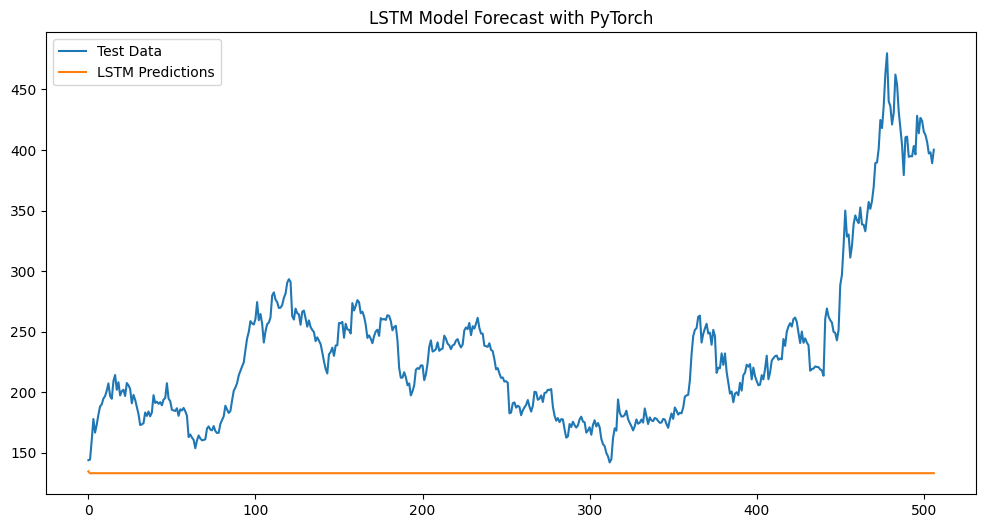

LSTM Model MAE: 100.47992706298828
LSTM Model RMSE: 119.80239671147027
LSTM Model MAPE: 39.42008582702638%


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare data for LSTM
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq, train_label))
    return inout_seq

train_data = torch.FloatTensor(train.values).view(-1)
test_data = torch.FloatTensor(test.values).view(-1)
train_window = 60
train_inout_seq = create_inout_sequences(train_data, train_window)

class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super(LSTM, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.hidden_cell = (torch.zeros(1, 1, self.hidden_layer_size),
                            torch.zeros(1, 1, self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

model = LSTM()
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 50
for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                             torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i % 10 == 0:
        print(f'Epoch: {i} Loss: {single_loss.item()}')

# Test the model
model.eval()
test_inputs = train_data[-train_window:].tolist()

for i in range(len(test)):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())

test_predictions = test_inputs[train_window:]

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(test_data.numpy(), label='Test Data')
plt.plot(test_predictions, label='LSTM Predictions')
plt.title('LSTM Model Forecast with PyTorch')
plt.legend()
plt.show()

# Evaluation Metrics
mae_lstm = mean_absolute_error(test_data.numpy(), test_predictions)
rmse_lstm = np.sqrt(mean_squared_error(test_data.numpy(), test_predictions))
mape_lstm = np.mean(np.abs((test_data.numpy() - test_predictions) / test_data.numpy())) * 100

print(f"LSTM Model MAE: {mae_lstm}")
print(f"LSTM Model RMSE: {rmse_lstm}")
print(f"LSTM Model MAPE: {mape_lstm}%")


In [14]:
# Save the LSTM model
torch.save(model.state_dict(), 'best_lstm_model.pth')

In [15]:
# Define the model architecture as before
loaded_lstm_model = LSTM()
loaded_lstm_model.load_state_dict(torch.load('best_lstm_model.pth'))
loaded_lstm_model.eval()  # Set the model to evaluation mode


LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)